In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# 匯入套件

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
#讓繪製圖可以顯示在頁面裡的"magic function"
import seaborn as sns
import sys

#助教使用
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import *
from sklearn.preprocessing import *
from sklearn.neural_network import MLPClassifier

/Users/linyanyu/anaconda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 匯入資料

In [3]:
train_data = pd.read_csv('train-v3.csv')
valid_data = pd.read_csv('valid-v3.csv')
test_data = pd.read_csv('test-v3.csv')

# 資料處理

In [4]:
#查看缺失值
train_data.isnull().sum()

id               0
price            0
sale_yr          0
sale_month       0
sale_day         0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
#查看房價分佈
train_data.price.describe()

count    1.296700e+04
mean     5.373833e+05
std      3.668840e+05
min      7.500000e+04
25%      3.199500e+05
50%      4.470000e+05
75%      6.370000e+05
max      7.062500e+06
Name: price, dtype: float64

# 房價分佈視覺化

skew:  3.8115444767095075


/Users/linyanyu/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


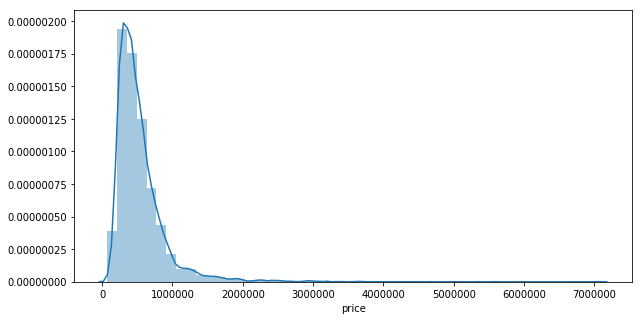

In [6]:
plt.figure(figsize = (10,5));
print("skew: ",train_data.price.skew())
sns.distplot(train_data['price']);

/Users/linyanyu/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


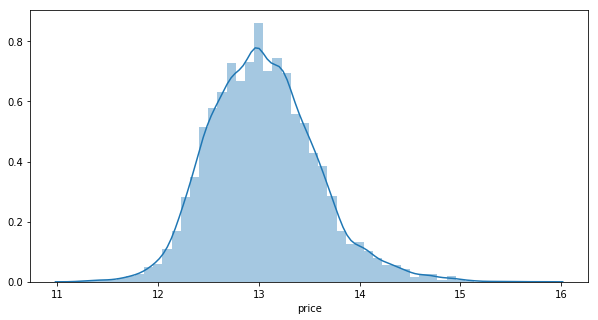

In [7]:
#透過log平滑價格資料
target = np.log(train_data.price)
plt.figure(figsize = (10,5))
sns.distplot(target);

# 查看各欄位與價格之間的關係

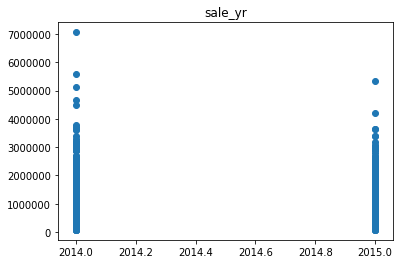

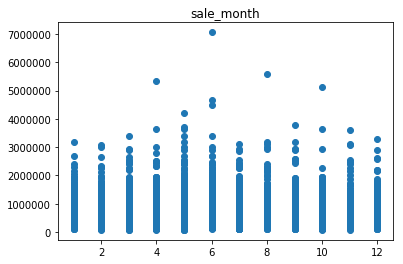

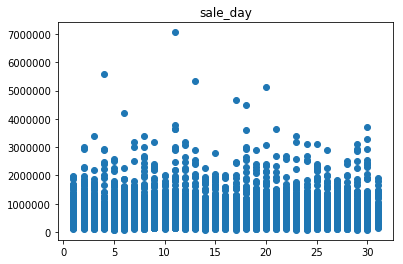

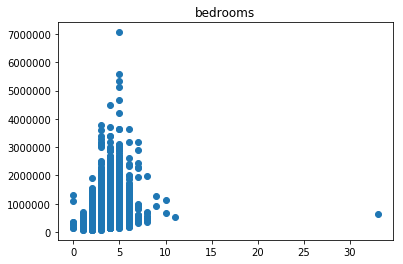

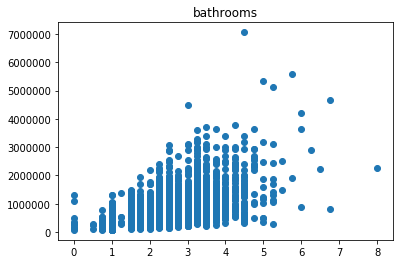

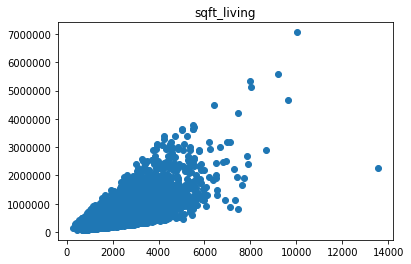

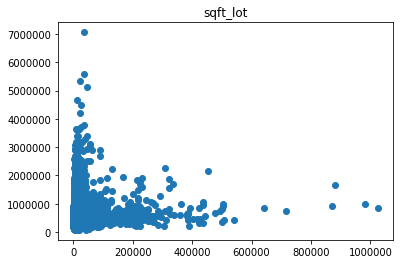

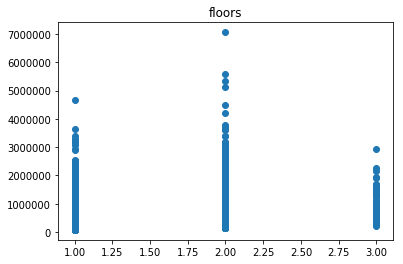

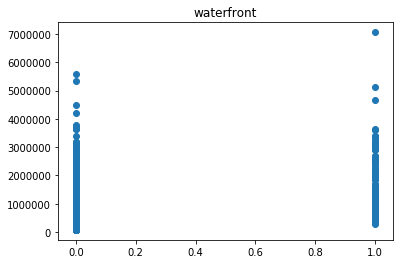

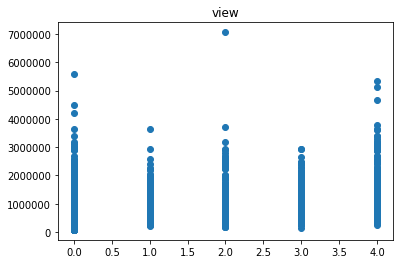

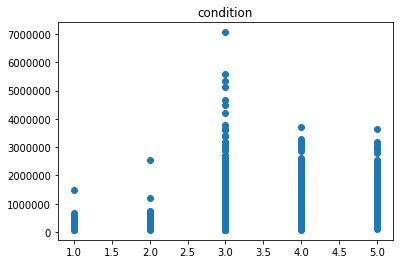

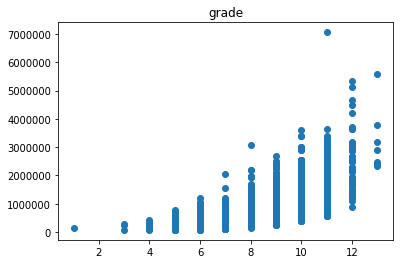

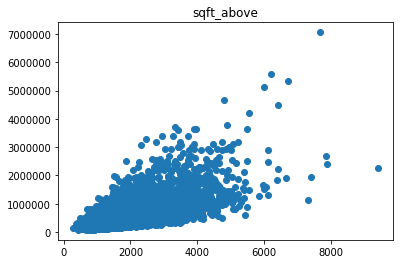

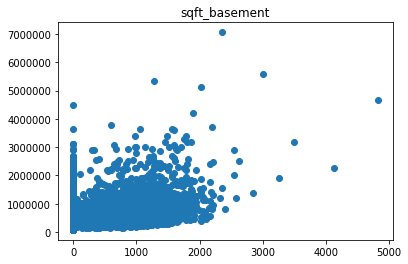

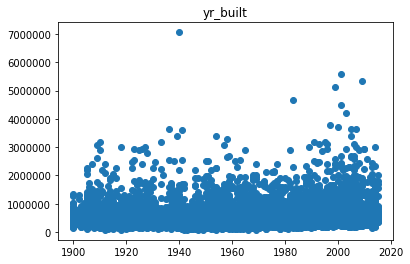

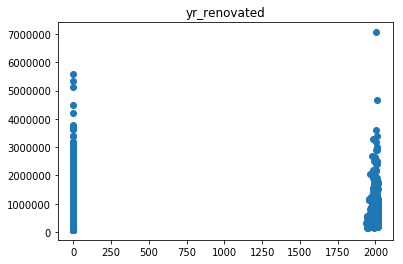

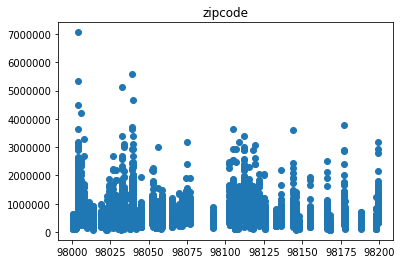

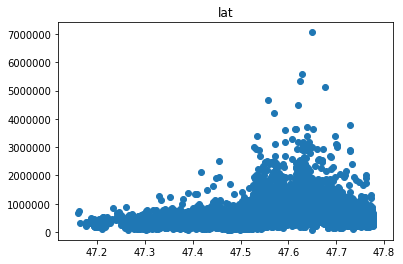

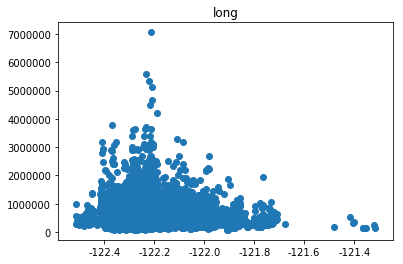

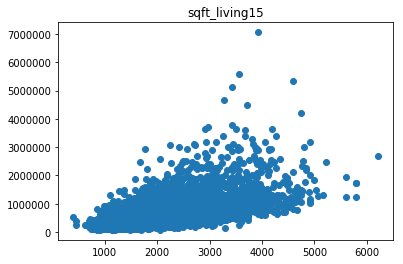

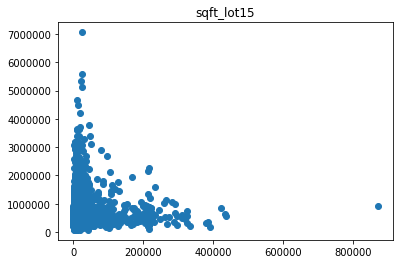

In [8]:
column_list = list(train_data.columns)
train_list = column_list[2:]

for i in train_list:
    #train_data[str(i)].values 
    plt.scatter(train_data[i],train_data['price'])
    plt.title(i)
    plt.show()
    

In [22]:
train_data = pd.read_csv('train-v3.csv')
valid_data = pd.read_csv('valid-v3.csv')
test_data = pd.read_csv('test-v3.csv')

# 新增資料集

In [23]:
#處理是否翻修資料集
year_built = []
for i in range(len(train_data)):
    if train_data['yr_renovated'][i]==0:
        year_built.append(train_data['yr_built'][i])
    else:
        year_built.append(train_data['yr_renovated'][i])
            

built_newest = pd.DataFrame(year_built)
built_newest.columns = ['built_newest']

train_data['built_newest'] = built_newest

#處理是否翻修資料集
year_built = []
for i in range(len(valid_data)):
    if valid_data['yr_renovated'][i]==0:
        year_built.append(valid_data['yr_built'][i])
    else:
        year_built.append(valid_data['yr_renovated'][i])
            

built_newest = pd.DataFrame(year_built)
built_newest.columns = ['built_newest']

valid_data['built_newest'] = built_newest


#處理是否翻修資料集
year_built = []
for i in range(len(test_data)):
    if test_data['yr_renovated'][i]==0:
        year_built.append(test_data['yr_built'][i])
    else:
        year_built.append(test_data['yr_renovated'][i])
            

built_newest = pd.DataFrame(year_built)
built_newest.columns = ['built_newest']

test_data['built_newest'] = built_newest


In [24]:
#有重新翻修為1，沒有翻修為0
if_renovated = []
for i in range(len(train_data)):
    if train_data['yr_renovated'][i]!=0:
        if_renovated.append(1)
    else:
        if_renovated.append(0)
            
if_renovated = pd.DataFrame(if_renovated)
if_renovated.columns = ['if_renovated']
train_data['if_renovated'] = if_renovated

if_renovated = []
for i in range(len(valid_data)):
    if valid_data['yr_renovated'][i]!=0:
        if_renovated.append(1)
    else:
        if_renovated.append(0)            

if_renovated = pd.DataFrame(if_renovated)
if_renovated.columns = ['if_renovated']
valid_data['if_renovated'] = if_renovated

if_renovated = []
for i in range(len(test_data)):
    if test_data['yr_renovated'][i]!=0:
        if_renovated.append(1)
    else:
        if_renovated.append(0)            

if_renovated = pd.DataFrame(if_renovated)
if_renovated.columns = ['if_renovated']
test_data['if_renovated'] = if_renovated


In [25]:
#銷售年份-建造年份 = 幾年房
year_house = []
for i in range(len(train_data)):
    house = train_data['sale_yr'][i]-train_data['yr_built'][i]
    year_house.append(house)

house_newest = pd.DataFrame(year_house)
house_newest.columns = ['house_newest']

train_data['house_newest'] = house_newest

year_house = []
for i in range(len(valid_data)):
    house = valid_data['sale_yr'][i]-valid_data['yr_built'][i]
    year_house.append(house)

house_newest = pd.DataFrame(year_house)
house_newest.columns = ['house_newest']

valid_data['house_newest'] = house_newest

year_house = []
for i in range(len(test_data)):
    house = test_data['sale_yr'][i]-test_data['yr_built'][i]
    year_house.append(house)

house_newest = pd.DataFrame(year_house)
house_newest.columns = ['house_newest']

test_data['house_newest'] = house_newest

# 查看特徵與目標向量之間的相關性

In [26]:
#檢測數值特徵與目標向量之間的相關性
corr_train_data = train_data.corr()
corr_train_data

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_newest,if_renovated,house_newest
id,1.000000,-0.018552,0.011739,-0.015319,-0.000028,-0.001835,0.003585,-0.017667,-0.142302,0.021799,...,0.023552,-0.015689,-0.009795,-0.003877,0.016109,-0.008666,-0.142482,0.020733,-0.015745,-0.023362
price,-0.018552,1.000000,0.007752,-0.024029,-0.008888,0.301817,0.521330,0.702100,0.101519,0.241054,...,0.057491,0.129219,-0.052930,0.309688,0.020066,0.586408,0.078428,0.108181,0.128819,-0.057360
sale_yr,0.011739,0.007752,1.000000,-0.781698,0.000353,0.001494,-0.015368,-0.021402,0.006448,-0.018299,...,-0.001010,-0.013095,0.008871,-0.026338,-0.002823,-0.017867,0.002483,-0.005954,-0.013087,0.016868
sale_month,-0.015319,-0.024029,-0.781698,1.000000,-0.066544,-0.010604,-0.007158,-0.000472,-0.007040,0.010150,...,-0.008522,0.004638,-0.003360,0.007777,-0.007013,-0.005913,-0.002281,-0.007750,0.004682,-0.003875
sale_day,-0.000028,-0.008888,0.000353,-0.066544,1.000000,-0.002956,-0.000282,-0.004819,-0.015035,-0.002563,...,-0.003967,0.015097,-0.011836,-0.003930,-0.005230,-0.000844,-0.009109,-0.001034,0.015132,0.003972
bedrooms,-0.001835,0.301817,0.001494,-0.010604,-0.002956,1.000000,0.506150,0.563715,0.043723,0.158787,...,0.158293,0.017019,-0.153187,-0.011471,0.134836,0.383713,0.035662,0.169432,0.016700,-0.158246
bathrooms,0.003585,0.521330,-0.015368,-0.007158,-0.000282,0.506150,1.000000,0.751196,0.111547,0.525690,...,0.517302,0.051187,-0.210371,0.023491,0.229700,0.571972,0.098087,0.547468,0.050659,-0.517472
sqft_living,-0.017667,0.702100,-0.021402,-0.000472,-0.004819,0.563715,0.751196,1.000000,0.199900,0.356204,...,0.321174,0.056815,-0.198690,0.057183,0.241130,0.757771,0.192312,0.345642,0.056509,-0.321467
sqft_lot,-0.142302,0.101519,0.006448,-0.007040,-0.015035,0.043723,0.111547,0.199900,1.000000,-0.001955,...,0.061289,0.015304,-0.134486,-0.098030,0.243222,0.160086,0.719971,0.063060,0.015373,-0.061179
floors,0.021799,0.241054,-0.018299,0.010150,-0.002563,0.158787,0.525690,0.356204,-0.001955,1.000000,...,0.583424,-0.013754,-0.101169,0.036589,0.161123,0.297821,-0.010979,0.587950,-0.013813,-0.583631


In [27]:
price_corr = corr_train_data["price"].abs().sort_values(ascending=False)
price_corr[price_corr >= 0.05]

price            1.000000
sqft_living      0.702100
grade            0.672523
sqft_above       0.601167
sqft_living15    0.586408
bathrooms        0.521330
view             0.404273
sqft_basement    0.337082
lat              0.309688
bedrooms         0.301817
waterfront       0.266653
floors           0.241054
yr_renovated     0.129219
if_renovated     0.128819
built_newest     0.108181
sqft_lot         0.101519
sqft_lot15       0.078428
yr_built         0.057491
house_newest     0.057360
zipcode          0.052930
Name: price, dtype: float64

#嘗試將數值型資料轉為類別型資料 ->但效果不佳故不採用
train_data = pd.get_dummies(data=train_data,columns=['grade','condition','sale_month'])
valid_data = pd.get_dummies(data=valid_data,columns=['grade','condition','sale_month'])
test_data = pd.get_dummies(data=test_data,columns=['grade','condition','sale_month'])

# 檢測特徵與目標向量之間的相關性

In [35]:
#檢測數值特徵與目標向量之間的相關性

price_corr = corr_train_data["price"].abs().sort_values(ascending=False)
price_corr[price_corr >= 0.05]

price            1.000000
sqft_living      0.702100
grade            0.672523
sqft_above       0.601167
sqft_living15    0.586408
bathrooms        0.521330
view             0.404273
sqft_basement    0.337082
lat              0.309688
bedrooms         0.301817
waterfront       0.266653
floors           0.241054
yr_renovated     0.129219
if_renovated     0.128819
built_newest     0.108181
sqft_lot         0.101519
sqft_lot15       0.078428
yr_built         0.057491
house_newest     0.057360
zipcode          0.052930
Name: price, dtype: float64

In [29]:
#選取相關性較高的特徵
data_title=['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement',
            'lat','bedrooms','waterfront','floors','if_renovated','built_newest','sqft_lot','sqft_lot15',
            'house_newest','zipcode']

# 整理資料集-去除id、price

In [30]:
train_data.drop(['id'], inplace = True, axis=1)
valid_data.drop(['id'], inplace = True, axis=1)
test_data.drop(['id'], inplace = True, axis=1)

In [31]:
len(train_data)

12967

In [32]:
#去除極端值
train_data = train_data[train_data.price != max(train_data.price)]
train_data = train_data[train_data.bedrooms!=max(train_data.bedrooms)]
train_data = train_data[train_data.sqft_lot15 != max(train_data.sqft_lot15)]
train_data = train_data.reset_index(drop=True)

In [33]:
Y_train = train_data['price'].values
X_train = train_data[data_title].values

Y_valid = valid_data['price'].values
X_valid = valid_data[data_title].values

X_test = test_data[data_title].values

# 簡單線性迴歸挑選參數

In [34]:
from sklearn import linear_model
import statsmodels.api as sm

Y = train_data['price'].values
X = train_data[data_title].values


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -31032194.919992812
Coefficients: 
 [ 1.25315385e+02  8.80444796e+04  5.18160913e+01  9.64750391e+00
 -1.49449243e+04  8.92979651e+04  7.34992941e+01  6.43405081e+05
 -2.70577471e+04  1.35462739e+05]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2692.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:10:50   Log-Likelihood:            -1.7751e+05
No. Observations:               12964   AIC:                         3.550e+05
Df Residuals:                   12954   BIC:                         3.551e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                       

In [238]:
#標準化
X_train_normal = scale(X_train)
X_valid_normal = scale(X_valid)
X_test_normal = scale(X_test)

#MLP_MODEL

In [239]:
model=Sequential()
model.add(Dense(37,input_dim=X_train_normal.shape[1],init='normal',activation='relu'))
model.add(Dense(53,input_dim=37,init='normal',activation='relu'))
model.add(Dense(128,input_dim=53,init='normal',activation='relu'))
model.add(Dense(76,input_dim=128,init='normal',activation='relu'))
model.add(Dense(55,input_dim=76,init='normal',activation='relu'))
model.add(Dense(28,input_dim=55,init='normal',activation='relu'))
model.add(Dense(1 ,init='normal'))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train_normal,Y_train,batch_size=32,nb_epoch=500,verbose=2,validation_data=(X_valid_normal,Y_valid))


/Users/linyanyu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(37, activation="relu", kernel_initializer="normal", input_dim=10)`
  from ipykernel import kernelapp as app
/Users/linyanyu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(53, activation="relu", kernel_initializer="normal", input_dim=37)`
  app.launch_new_instance()
/Users/linyanyu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal", input_dim=53)`
/Users/linyanyu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(76, activation="relu", kernel_initializer="normal", input_dim=128)`
/Users/linyanyu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning

Train on 12964 samples, validate on 2161 samples
Epoch 1/500
 - 2s - loss: 175461043663.5014 - val_loss: 43095305567.1263
Epoch 2/500
 - 1s - loss: 44655021978.8954 - val_loss: 39340123444.4794
Epoch 3/500
 - 1s - loss: 42804549710.3561 - val_loss: 39013723058.7617
Epoch 4/500
 - 1s - loss: 42102035914.4462 - val_loss: 37857851222.3600
Epoch 5/500
 - 1s - loss: 41919639069.8575 - val_loss: 39258335170.3989
Epoch 6/500
 - 1s - loss: 41252573355.8778 - val_loss: 37293637548.6016
Epoch 7/500
 - 1s - loss: 41231767617.5600 - val_loss: 37119886206.6377
Epoch 8/500
 - 1s - loss: 40711562741.7316 - val_loss: 37461777586.6432
Epoch 9/500
 - 1s - loss: 40744246937.0787 - val_loss: 36619853607.9223
Epoch 10/500
 - 1s - loss: 40484087331.5446 - val_loss: 36481696138.2471
Epoch 11/500
 - 1s - loss: 40197392724.5961 - val_loss: 36908501855.3633
Epoch 12/500
 - 1s - loss: 40240858852.2752 - val_loss: 36716864086.9523
Epoch 13/500
 - 1s - loss: 39849888784.1135 - val_loss: 35881651672.4331
Epoch 14/5

Epoch 113/500
 - 1s - loss: 25773700142.7609 - val_loss: 24332522763.7279
Epoch 114/500
 - 1s - loss: 25694035851.7692 - val_loss: 30121812479.7631
Epoch 115/500
 - 1s - loss: 26109207908.7097 - val_loss: 27086739546.0324
Epoch 116/500
 - 1s - loss: 25752143931.5569 - val_loss: 25126499461.1532
Epoch 117/500
 - 1s - loss: 25405516481.5205 - val_loss: 25207331310.7043
Epoch 118/500
 - 1s - loss: 25958521708.8454 - val_loss: 28014077798.4711
Epoch 119/500
 - 1s - loss: 25724401780.5862 - val_loss: 27218952579.1393
Epoch 120/500
 - 1s - loss: 25310608558.9583 - val_loss: 24761916186.1805
Epoch 121/500
 - 1s - loss: 25804165064.5504 - val_loss: 24804252592.3924
Epoch 122/500
 - 1s - loss: 25791201109.7019 - val_loss: 24451677507.1689
Epoch 123/500
 - 1s - loss: 25308872102.4276 - val_loss: 25131172226.6654
Epoch 124/500
 - 1s - loss: 25089545142.3832 - val_loss: 27567876265.6400
Epoch 125/500
 - 1s - loss: 25258402112.6911 - val_loss: 25764510699.6242
Epoch 126/500
 - 1s - loss: 2530006860

Epoch 224/500
 - 1s - loss: 22271715304.3036 - val_loss: 26804725789.3790
Epoch 225/500
 - 1s - loss: 22518167122.7794 - val_loss: 26266627740.6090
Epoch 226/500
 - 1s - loss: 22654067906.3104 - val_loss: 25905225944.5516
Epoch 227/500
 - 1s - loss: 22659677983.0423 - val_loss: 25819762504.6182
Epoch 228/500
 - 1s - loss: 22300016733.5218 - val_loss: 26323099936.1037
Epoch 229/500
 - 1s - loss: 22607024852.4776 - val_loss: 26691743670.5525
Epoch 230/500
 - 1s - loss: 22443285316.6405 - val_loss: 29455249035.5502
Epoch 231/500
 - 1s - loss: 22501760808.9948 - val_loss: 26059227643.0245
Epoch 232/500
 - 1s - loss: 22225443525.1540 - val_loss: 25907078538.7210
Epoch 233/500
 - 1s - loss: 22423293926.3289 - val_loss: 25516290673.4882
Epoch 234/500
 - 1s - loss: 22124223478.2055 - val_loss: 27005734043.8982
Epoch 235/500
 - 2s - loss: 22457197230.8794 - val_loss: 26743754508.4387
Epoch 236/500
 - 2s - loss: 22205692291.3570 - val_loss: 30791609906.4655
Epoch 237/500
 - 2s - loss: 2211155932

Epoch 335/500
 - 1s - loss: 19564241348.9960 - val_loss: 25902404198.5895
Epoch 336/500
 - 1s - loss: 19387929133.3391 - val_loss: 26755896294.1749
Epoch 337/500
 - 1s - loss: 19592348826.6584 - val_loss: 26106801625.8547
Epoch 338/500
 - 1s - loss: 19178676170.9201 - val_loss: 28731542642.1990
Epoch 339/500
 - 1s - loss: 19131077703.2471 - val_loss: 26051430801.8288
Epoch 340/500
 - 1s - loss: 18989208709.9636 - val_loss: 25947828152.9218
Epoch 341/500
 - 1s - loss: 18832950619.5471 - val_loss: 26833823504.7034
Epoch 342/500
 - 1s - loss: 19122250620.2481 - val_loss: 25428098607.6224
Epoch 343/500
 - 1s - loss: 19064536995.7421 - val_loss: 25711653048.0925
Epoch 344/500
 - 1s - loss: 19024257006.6226 - val_loss: 26162781534.6525
Epoch 345/500
 - 1s - loss: 19100090900.5764 - val_loss: 25533572892.7867
Epoch 346/500
 - 1s - loss: 18686291788.2234 - val_loss: 26898058224.8367
Epoch 347/500
 - 1s - loss: 19030941618.2758 - val_loss: 25157610190.6006
Epoch 348/500
 - 1s - loss: 1881962959

Epoch 446/500
 - 1s - loss: 16778000824.4369 - val_loss: 27839941813.0125
Epoch 447/500
 - 1s - loss: 16580786972.8306 - val_loss: 29845653765.5678
Epoch 448/500
 - 1s - loss: 16547906907.2311 - val_loss: 30694216758.4933
Epoch 449/500
 - 1s - loss: 16007455180.3419 - val_loss: 27535062311.2115
Epoch 450/500
 - 1s - loss: 15935578673.6044 - val_loss: 28436720474.1509
Epoch 451/500
 - 1s - loss: 16376427290.6189 - val_loss: 25846296542.3563
Epoch 452/500
 - 1s - loss: 16308190775.7655 - val_loss: 27183468277.6937
Epoch 453/500
 - 1s - loss: 16480718614.8275 - val_loss: 29503472045.7862
Epoch 454/500
 - 1s - loss: 16305444692.1222 - val_loss: 29758021328.7330
Epoch 455/500
 - 1s - loss: 15972631587.0707 - val_loss: 32153613720.4627
Epoch 456/500
 - 1s - loss: 16019418094.9386 - val_loss: 25652277976.7885
Epoch 457/500
 - 1s - loss: 16254258344.4023 - val_loss: 26631580619.4021
Epoch 458/500
 - 1s - loss: 15777879504.4492 - val_loss: 29919455046.0120
Epoch 459/500
 - 1s - loss: 1630154931

In [234]:
Y_predict=model.predict(X_test_normal)

n=len(Y_predict)+1
for i in range(1,n): 
    b= np.arange(1,n,1) 
    b=np.transpose([b])
    Y=np.column_stack((b,Y_predict))

np.savetxt('test19.0.csv',Y,delimiter=',',fmt='%i')